# 機械学習とは？

<center>
明示的に program しなくても（都度教えなくても）, PCが自ら学ぶ（学習する）事ができるようにする為にはどうすれば良いのかを考える分野
<center>
    ↓
<b><center>
コンピュータが自ら学ぶ
</center></b>
    ↓
<center>
データが増えていく事によって最適な解が変わっていく
</center>

#### <u>T　:　タスクT</u>
- *何かしらの判断をしてくれる　program*
    - 例） 健康かどうかを判定する仕組み自体
        - **model, アルゴリズム, 数式**

<u>E　:　経験E</u>
- *ある人が健康かどうかを示す data*
    - 例) 血圧・血糖値・体重 etc...
        - **数値**
    
#### <u>P　:　正答率P</u>
- *健康かどうかを正しく判断した場合の割合*


    
<center>
問題・課題
<center>
    ↓
<center>
人間が自ら考えて行動
<center>
    ↓
<center>
　色々な経験・体感の積み重ね
<center>
    ↓
<center>
結果を受け状況に応じて改善　or　現状維持(現状はbest practice)
<center>
    ↓
<center>
問題解決能力・意思決定能力
<center>
    ||
<b><center>
より良いモノ・価値・人生を生み出す為の努力の過程
<center></b>

# 単回帰分析

<center>
1. インプット data の整理
<center>
    ↓
<center>
2. アウトプット data の整理
<center>
    ↓
<center>
3. 分析方法（ model ）について考える
<center>

## Algorithm 作成

#### <u>ビールの売れ行き予測</u>
- *入力データの整理*

|気温|売上|
|:---:|:---:|
|20℃|30本|
|23℃|32本|
|28℃|40本|
|30℃|44本|


#### $$
(　20,　30　),　(　23,　32　),　(　28,　40　),　(　30,　44　)
$$

## <u>誤差関数の導出</u>

### 1. *誤差の導出*

$$
\hat{y}=\omega_0+\omega_1x　　　(x_1, y_1)　　　\hat{y}=\omega_0+\omega_1x-y_1
$$


### 2. *誤差関数の導出*
- $x_1, y_1=　(20, 30), (23, 32), (28, 40), (30, 44)$

$$
(\hat{y}-y)^2　=　(\omega_0+\omega_1x_1-y_1)^2　
$$

$$
=　\omega_0^2　+　\omega_1^2x_1^2　+　y_1^2　+　2\omega_0\omega_1x_1　-　2\omega_0\omega_1x_1y_1　-　2\omega_0y_1
$$


### 3. *導入関数の導出*
- $x_1, y_1=　(20, 30), (23, 32), (28, 40), (30, 44)$

    - 1. 初期重み　$(\omega_0, \omega_1 )$ における傾きを計算

$$
\frac{\partial f}{\partial \omega_0}　=　2\omega0　+　2\omega1x1　-　2y1
$$

$$
\frac{\partial f}{\partial \omega_1}　=　2\omega_1x_1^2　+　2\omega_0x_1　-　2x_1y_1
$$

$$
=　x1( 2\omega_1x_1　+　2\omega_0　-　2y_1 )
$$


- 2. 傾きの方向に動かす

$$
\omega_0　:=　\omega_0　-　\alpha(2\omega_0　+　2\omega_1x_1　-　2y_1)
$$

$$
\omega_1　:=　\omega_1　-　\alpha(x1(2\omega_1x_1　+　2\omega_0　-　2y_1))
$$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib        # グラフ日本語対応
%matplotlib inline

In [2]:
input_data = np.array([[20, 30], [23, 32], [28, 40], [30, 44]])
data_num = input_data.shape[0]

### **誤差関数の導出**
- $x_1, y_1=　(20, 30), (23, 32), (28, 40), (30, 44)$

- *$\omega$　=　重み*

- **傾きを求める為の基の式**


$$
(\hat{y}-y)^2　=　(\omega_0+\omega_1x_1-y_1)^2　
$$

$$
(\omega_0+\omega_1x_1-y_1)^2　=　\omega_0^2　+　\omega_1^2x_1^2　+　y_1^2　+　2\omega_0\omega_1x_1　-　2\omega_0\omega_1x_1y_1　-　2\omega_0y_1
$$


In [3]:
epochs = 100                   # (最急降下法に基づいて)そのセットを何回やるか : epochs
alpha = 0.0005                 # 傾き方向にどれくらい動かすかの程度を示す : 標準化してないので

# 重みの設定 : 一般的には random.randn などの関数を使用する/今回は理解の為自身で設定
w0 = 0.1
w1 = 0.1

# 1.  1回毎に 傾き x α分だけ W0方向 W１方向 に少しだけずらす。(最急降下法に基づいて)指定されたセットをやる
for t in range(epochs):
    
    # 傾きの初期化(定義づけ)
    dw0 = 0
    dw1 = 0
    
    # 2. 誤差関数を微分
    for i in range(data_num):
        dw0 = dw0 + 2*w0 + 2*w1*input_data[i, 0] - 2*input_data[i, 1]      # w0の傾き
        dw1 = dw1 + input_data[i, 0]*(2*w1*input_data[i, 0] + 2*w0 - 2*input_data[i, 1])  # w1方向の傾き

    # 3. 最急降下法で重みの更新
    w0 = w0 - alpha*(dw0)
    w1 = w1 - alpha*(dw1)

*1. epochs で指定した数だけ　for文の一連の code が実行される*

*2. data　の数分だけ、足し算がされて　=　残差の２乗　+　誤差関数の偏微分の値　=　w0,　w1　の傾きを表す*

*3. 傾きに　$\alpha$*　を掛けた分だけ　$\omega$(重み)　の位置を少しずらす

*4. 上記を epochs の数だけ繰り返す*

- <u>dw0, dw1　=　傾きは　1回1回 0 にするためにfor分の中で初期化の定義している</u>

- **更新後の傾きがどんどん足されてしまうので、1回1回　0 にしてクリアにして計算する事で正しい値が取得できる**

### 正しい回帰ができているのか?
- plot してみる

Text(0.5, 0, '気温')

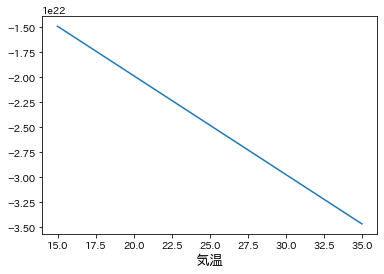

In [4]:
# w0 w1 の値を plot

# x軸, y軸を決める　：　　x軸に対応してy軸が plot されていく
x = np.linspace(15, 35, 100)
y = w0 + w1*x

plt.plot(x, y)
plt.xlabel('気温', fontsize=14)

- 間違っている...

- 気温が上がれば、ビールの本数が増える前提なので右肩上がりになるはず

- **検証していく**

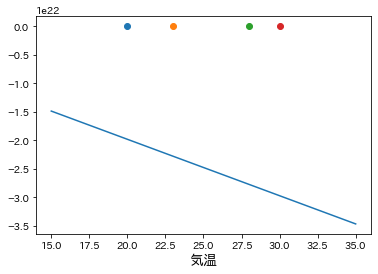

In [5]:
# w0 w1 の値を plot

# x軸, y軸を決める　：　　x軸に対応してy軸が plot されていく
x = np.linspace(15, 35, 100)
y = w0 + w1*x

plt.plot(x, y)
plt.xlabel('気温', fontsize=14)

# data　を1個づつ plot していく
for u in range(data_num):
    plt.scatter(input_data[u, 0], input_data[u, 1])

- 何が原因なのか？

    - 傾きがどうなって行くのか？を確認した方が良い
    - 最急降下法によりどんどんの傾きが極値に近づく　=　0に近づく
        - **print( )関数で傾きを確認してみる**

In [7]:
epochs = 100                   # (最急降下法に基づいて)そのセットを何回やるか : epochs
alpha = 0.0005                 # 傾き方向にどれくらい動かすかの程度を示す : 標準化してない

# 重みの設定 : 一般的には random.randn などの関数を使用する/今回は理解の為自身で設定
w0 = 0.1
w1 = 0.1

# 1.  1回毎に 傾き x α分だけ W0方向 W１方向 に少しだけずらす。(最急降下法に基づいて)指定されたセットをやる
for t in range(epochs):
    
    # 傾きの初期化(定義づけ)
    dw0 = 0
    dw1 = 0
    
    # 2. 誤差関数を微分
    for i in range(data_num):
        dw0 = dw0 + 2*w0 + 2*w1*input_data[i, 0] - 2*input_data[i, 1]      # w0の傾き
        dw1 = dw1 + input_data[i, 0]*(2*w1*input_data[i, 0] + 2*w0 - 2*input_data[i, 1])  # w1方向の傾き

    # 3. 最急降下法で重みの更新
    w0 = w0 - alpha*(dw0)
    w1 = w1 - alpha*(dw1)
    print(dw0)

-271.0
438.0132000000001
-708.3931234000001
1145.2359602246001
-1851.904461322405
2994.1841460930873
-4841.476304077973
7828.035103627959
-12657.349632080208
20465.552648748882
-33091.00334459409
53504.81084292666
-86512.3148564549
139881.94769192353
-226175.86025777538
365704.50482801703
-591309.2753747846
956090.2153824335
-1545906.3425438693
2499582.1129789017
-4041584.6971094403
6534854.6396930525
-10566233.330157604
17084585.66857634
-27624136.52781059
44665579.03274427
-72219957.37040447
116772743.93314986
-188810326.86539748
305288188.6571262
-493621719.5507514
798138974.686034
-1290514168.843241
2086637631.3609507
-3373892910.512848
5455261229.651613
-8820634167.873781
14262119419.356136
-23060479152.018497
37286582945.92004
-60288828286.17944
97481252743.806
-157617835785.7807
254852922572.12244
-412072731615.8247
666282083122.5203
-1077314222053.748
1741913766613.414
-2816507485191.652
4554022458621.72
-7363417517145.719
11905939864033.117
-19250762803536.254
31126637019017.5

- **発散してしまっている**

    - *正規化　（標準化）　していなかったので　alpha　の値が悪さをしている*
    - *傾きの data があまりにも大きいので、$\alpha$ を掛けた分もっと大きくなってしまって、極値を飛び越えて反対側に行ってしまった*

#### 解決策
- **alpha　の値を小さくする**

In [8]:
epochs = 100                   # (最急降下法に基づいて)そのセットを何回やるか : epochs
alpha = 0.00005                 # 傾き方向にどれくらい動かすかの程度を示す : 標準化してない

# 重みの設定 : 一般的には random.randn などの関数を使用する/今回は理解の為自身で設定
w0 = 0.1
w1 = 0.1

# 1.  1回毎に 傾き x α分だけ W0方向 W１方向 に少しだけずらす。(最急降下法に基づいて)指定されたセットをやる
for t in range(epochs):
    
    # 傾きの初期化(定義づけ)
    dw0 = 0
    dw1 = 0
    
    # 2. 誤差関数を微分
    for i in range(data_num):
        dw0 = dw0 + 2*w0 + 2*w1*input_data[i, 0] - 2*input_data[i, 1]      # w0の傾き
        dw1 = dw1 + input_data[i, 0]*(2*w1*input_data[i, 0] + 2*w0 - 2*input_data[i, 1])  # w1方向の傾き

    # 3. 最急降下法で重みの更新
    w0 = w0 - alpha*(dw0)
    w1 = w1 - alpha*(dw1)
    print(dw0)

-271.0
-200.09867999999997
-147.75155523399997
-109.10317077157538
-80.56869766656365
-59.50142232417486
-43.94725071145808
-32.46345646121925
-23.98486085866864
-17.725032242029812
-13.103340572364587
-9.691101122819845
-7.171811847836111
-5.311796251451796
-3.938528735393561
-2.9246319956791496
-2.1760621470408807
-1.6233856869648946
-1.2153391945748524
-0.9140743945452243
-0.6916475421819541
-0.527427502755387
-0.40618211161147144
-0.3166653154868584
-0.2505740453909908
-0.20177806584922564
-0.1657513652126852
-0.13915234566979962
-0.1195138735053547
-0.10501444023397255
-0.09430920866984138
-0.08640527261984232
-0.08056955991796144
-0.0762608363529722
-0.07307950351534487
-0.07073053406662666
-0.0689961064930884
-0.06771540108192653
-0.06676968309659514
-0.06607128954239272
-0.06555549798939353
-0.0651745232468528
-0.06489308505017277
-0.06468513564153966
-0.06453144371145925
-0.06441781059980656
-0.06433375329957869
-0.06427153210607628
-0.06422543272121572
-0.06419123622379175
-0

- **傾きが減っていって極値に近づいて行っている**

    - <u>しっかり最急降下法がされている</u>

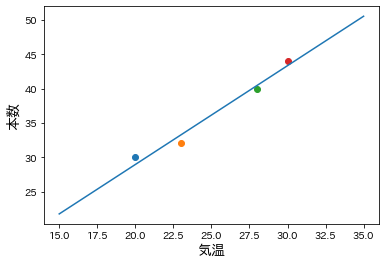

In [10]:
# w0 w1 の値を plot
# x軸, y軸を決める　：　　x軸に対応してy軸が plot されていく
x = np.linspace(15, 35, 100)
y = w0 + w1*x

plt.plot(x, y)
plt.xlabel('気温', fontsize=14)
plt.ylabel('本数', fontsize=14)

# data　を1個づつ plot していく
for u in range(data_num):
    plt.scatter(input_data[u, 0], input_data[u, 1])

- **最小二乗法に基づいて、最もそれらしい直線が引けている**